In [6]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from PIL import ImageFilter


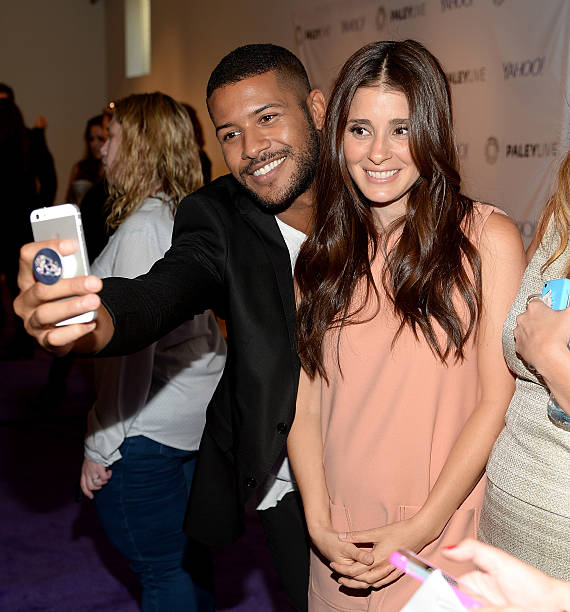

In [72]:
#open image uinsg PIL
img = Image.open('facial-img-1.jpg')
img

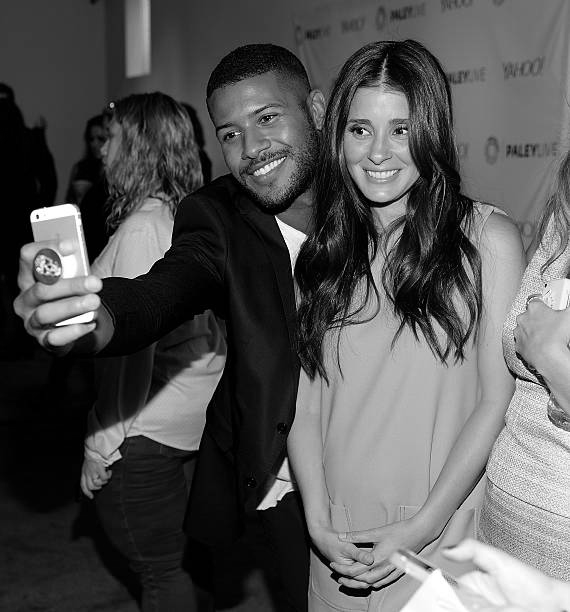

In [73]:
gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

In [74]:
r = requests.get('https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml')
with open('haarcascade_model.xml', 'w') as f:
    f.write(r.text)

face_cascade = cv2.CascadeClassifier('haarcascade_model.xml')

In [75]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[194,  80, 112, 112],
       [334,  95,  92,  92]])

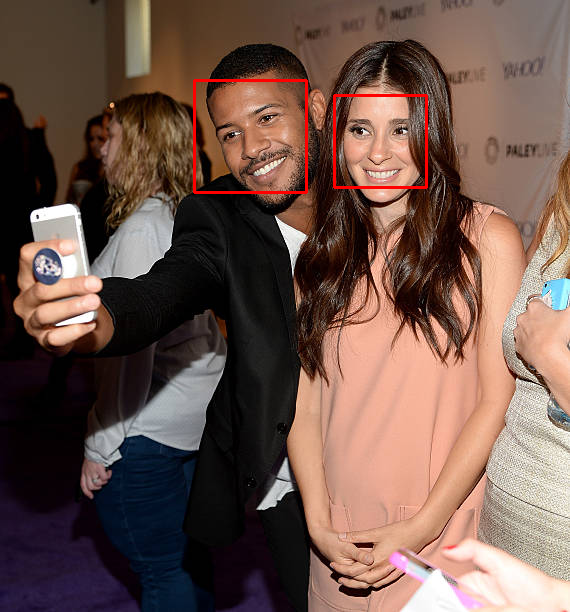

In [76]:
#draw rectangle around the faces
img_squares = np.array(img)
for (x,y,w,h) in faces:
    #PIL add rectangles
    cv2.rectangle(img_squares,(x,y),(x+w,y+h),(255,0,0),2)

Image.fromarray(img_squares)

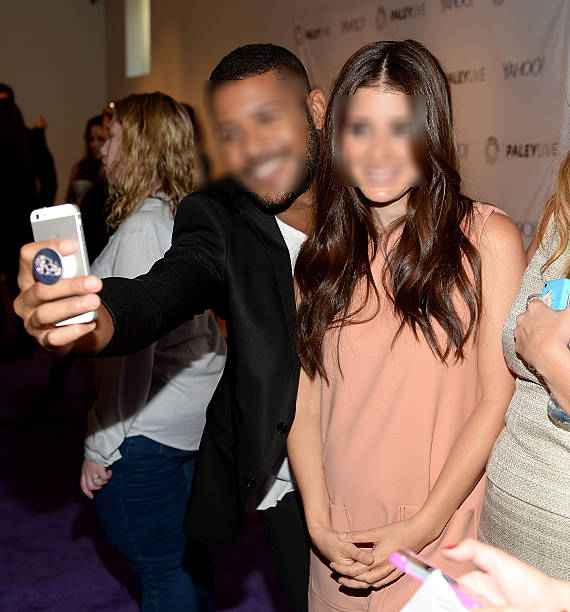

In [77]:
img_blurred = np.array(img)
for (x,y,w,h) in faces:
    cropped_img = img_blurred[y:y+h, x:x+w]
    #blur the image
    pil_img = Image.fromarray(cropped_img)
    blurred_img = pil_img.filter(ImageFilter.BoxBlur(5))
    img_blurred[y:y+h, x:x+w] = np.array(blurred_img)
Image.fromarray(img_blurred)